In [53]:
import matplotlib.pyplot as plt
import networkx as nx
import pickle
import math
import random

In [35]:
# Coordinates of boundaries of area of Lower Silesian Voivodeship

NORTH =  51.8047222
EAST = 14.8172222
SOUTH = 50.0961111
WEST = 17.795

# Population

#POPULATION = 2898525
POPULATION = 200
AVERAGE_NUMBER_OF_PEOPLE_IN_ONE_HOUSEHOLD_LOWER_SILESIAN = 2.50
NUMBER_OF_HOUSEHOLDS = int(POPULATION/AVERAGE_NUMBER_OF_PEOPLE_IN_ONE_HOUSEHOLD_LOWER_SILESIAN)
NUMBER_OF_HOUSEHOLDS = int(5/6 * NUMBER_OF_HOUSEHOLDS)

# Rectangular network:
HEIGHT = NORTH - SOUTH
WIDTH = WEST - EAST
NUMBER_OF_POINTS = NUMBER_OF_HOUSEHOLDS

NUMBER_OF_NODES_HEIGHT = int(math.sqrt(HEIGHT/WIDTH * NUMBER_OF_POINTS))
NUMBER_OF_NODES_WIDTH = int(NUMBER_OF_POINTS/NUMBER_OF_NODES_HEIGHT)

LENGTH_HEIGHT = HEIGHT/NUMBER_OF_NODES_HEIGHT
LENGTH_WIDTH = WIDTH/NUMBER_OF_NODES_WIDTH

## Rectangular network as neighbourhood

In [36]:
COORDINATES = []
for y in range(NUMBER_OF_NODES_HEIGHT):
    for x in range(NUMBER_OF_NODES_WIDTH):
        COORDINATES.append((x*LENGTH_WIDTH, y*LENGTH_HEIGHT))
        
X_COORDINATES = [x[0] for x in COORDINATES]
Y_COORDINATES = [x[1] for x in COORDINATES]

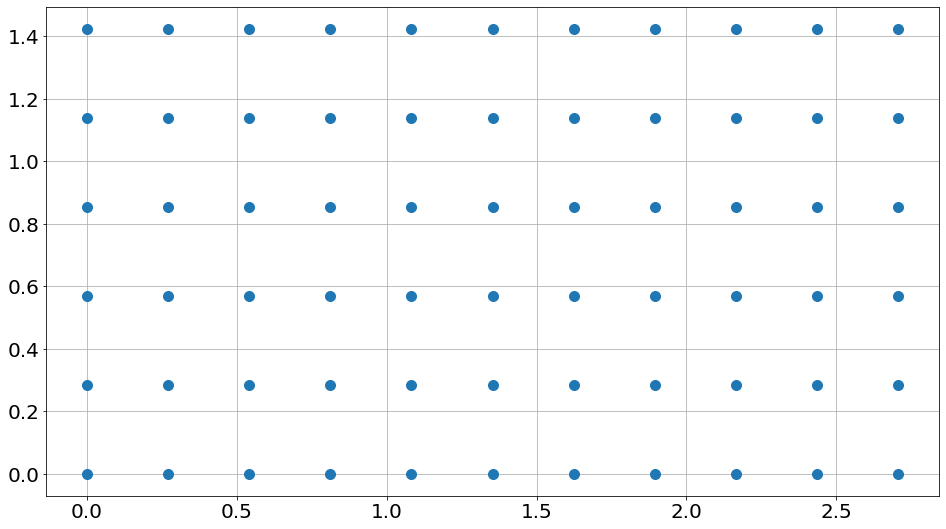

In [37]:
plt.figure(figsize=(16, 9))
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(X_COORDINATES, Y_COORDINATES, '.', markersize=20)
plt.show()

In [38]:
G = nx.grid_2d_graph(NUMBER_OF_NODES_HEIGHT, NUMBER_OF_NODES_WIDTH)
G = nx.convert_node_labels_to_integers(G)

In [39]:
pos = {}
for i, node in enumerate(G.nodes()):
    pos[node] = COORDINATES[i]

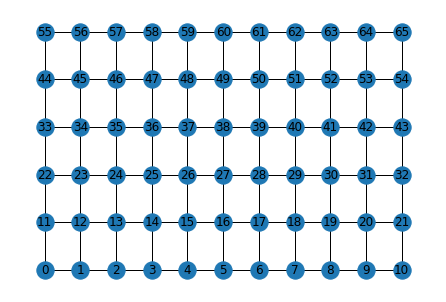

In [40]:
nx.draw(G, pos=pos, with_labels=True)

In [44]:
NUMBER_OF_NODES = NUMBER_OF_NODES_HEIGHT*NUMBER_OF_NODES_WIDTH

## Social interactions

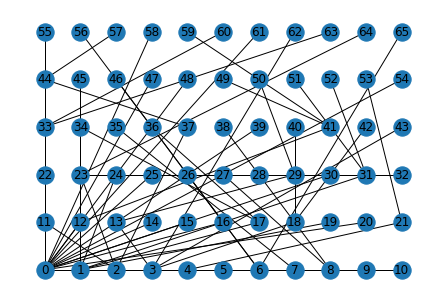

In [57]:
K = nx.barabasi_albert_graph(NUMBER_OF_NODES, 1)
nx.draw(K, with_labels=True, pos=pos)

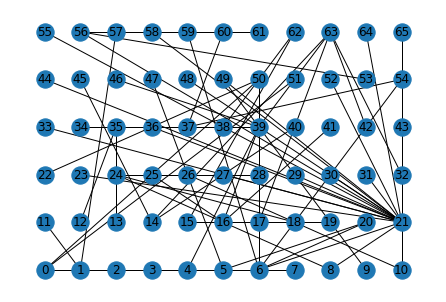

In [58]:
node_mapping = dict(zip(K.nodes(), sorted(K.nodes(), key=lambda k: random.random())))
K = nx.relabel_nodes(K, node_mapping)
nx.draw(K, with_labels=True, pos=pos)

## Social media influence

Star graph and center node should be treated as "Star" (information from different type of media e.g. TV, Internet)

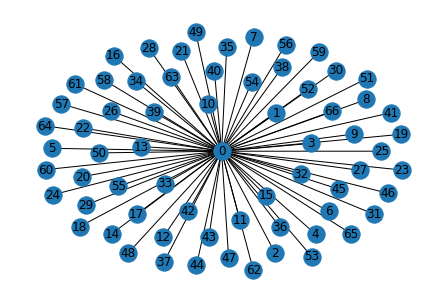

In [9]:
L = nx.star_graph(NUMBER_OF_NODES)
nx.draw(L, with_labels=True)

## Different types of graph

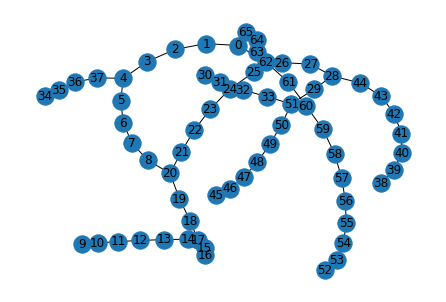

In [28]:
W = nx.watts_strogatz_graph(NUMBER_OF_NODES, 2, 0.1)
#pos = nx.circular_layout(W)
nx.draw(W, with_labels=True)

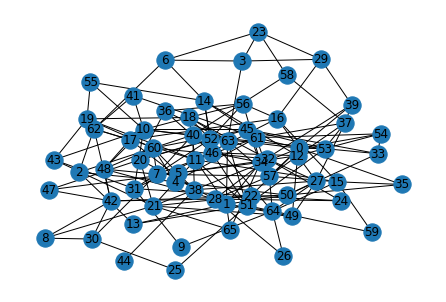

In [32]:
Z = nx.erdos_renyi_graph(NUMBER_OF_NODES, 0.09)
nx.draw(Z, with_labels=True)

## Pickle

#### Neighbourhood graph:

In [20]:
nx.write_gpickle(G, 'neighbourhood')

#### Neighbourhood positions:

In [41]:
with open('neighbourhood_position.pickle', 'wb') as handle:
    pickle.dump(pos, handle)